In [1]:
import matplotlib
%matplotlib nbagg


from mpl_toolkits.basemap import Basemap, cm
# requires netcdf4-python (netcdf4-python.googlecode.com)
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [ ]:
dirPath = 'http://thredds.northwestknowledge.net/thredds/dodsC/MET/pr/' 

filename = 'pr_2016.nc'
#fileName='agg_met_pr_1979_2015_WUSA.nc?lon[0:100:1385],lat[0:100:584],daily_accumulated_precipitation[0:1:0][0:1:0][0:1:0],day[0:1:2]'

my_example_nc_file = dirPath+filename
fh = Dataset(my_example_nc_file, mode='r')

In [ ]:
import numpy as np
import netcdftime
from datetime import datetime, date, timedelta as td


# Read data from an opendap server
import netCDF4

In [14]:
import numpy as np
import netcdftime
from datetime import datetime, date, timedelta as td


# Read data from an opendap server
import netCDF4
url = 'http://hydro1.sci.gsfc.nasa.gov:80/dods/GLDAS_NOAH025SUBP_3H'
# create a dataset object
dataset = netCDF4.Dataset(url)

In [ ]:
import numpy as np
import netcdftime
from datetime import datetime, date, timedelta as td


# Read data from an opendap server
import netCDF4
url = 'http://hydro1.sci.gsfc.nasa.gov:80/dods/GLDAS_NOAH025SUBP_3H'
# create a dataset object
dataset = netCDF4.Dataset(url)

In [15]:
dataset

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT data model, file format UNDEFINED):
    title: 0.25 Degree 3-Hourly Data From the Noah Model
    Conventions: COARDS
GrADS
    dataType: Grid
    history: Mon May 16 16:38:20 GMT 2016 : imported by GrADS Data Server 2.0
    dimensions(sizes): lat(600), lon(1440), time(47288)
    variables(dimensions): float64 time(time), float64 lat(lat), float64 lon(lon), float32 avgsurft(time,lat,lon), float32 canopint(time,lat,lon), float32 evap(time,lat,lon), float32 lwdown(time,lat,lon), float32 lwnet(time,lat,lon), float32 psurf(time,lat,lon), float32 qair(time,lat,lon), float32 qg(time,lat,lon), float32 qh(time,lat,lon), float32 qle(time,lat,lon), float32 qs(time,lat,lon), float32 qsb(time,lat,lon), float32 qsm(time,lat,lon), float32 rainf(time,lat,lon), float32 swe(time,lat,lon), float32 swdown(time,lat,lon), float32 swnet(time,lat,lon), float32 snowf(time,lat,lon), float32 soilm1(time,lat,lon), float32 soilm2(time,lat,lon), float32 so

In [119]:
for v in fh.variables.keys():
...     print v

lon
lat
day
daily_accumulated_precipitation


In [120]:
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
tmax = fh.variables['daily_accumulated_precipitation'][50:51]

tmax_units = fh.variables['daily_accumulated_precipitation'].units

In [121]:
fh.close()

In [122]:
lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

In [123]:
# Because our lon and lat variables are 1D, 
# use meshgrid to create 2D arrays 
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

<IPython.core.display.Javascript object>


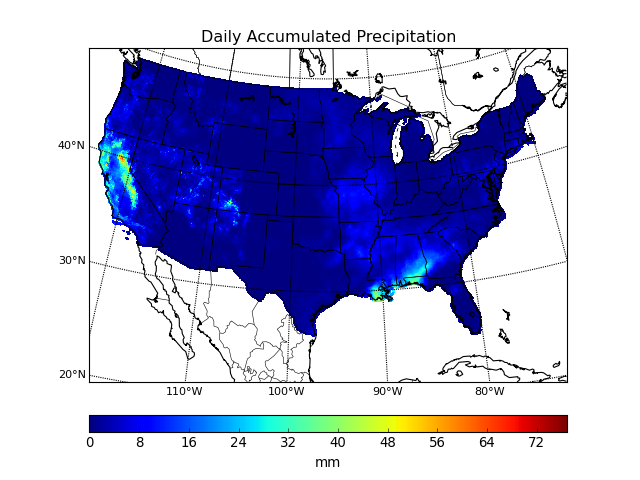

In [124]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(tmax))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(tmax_units)

# Add Title
plt.title('Daily Accumulated Precipitation')

plt.show()